In [4]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet

In [5]:
# establish file paths
# aura = Path('data/Sales_Aura.xls')
# ben = Path('data/Sales_Ben.xls')
# regal = Path('data/Sales_Regal.xls')
# ultra = Path('data/Sales_Ultraspec.xls')
# aura_mod = Path('data/Sales_Aura_remod.xls')
# full = Path('data/Sales_AllStores_ABRU.xlsx')
waco_path = Path('data/waco_full.xls')
all_stores_path = Path('data/allStores_2007toPresent.xls')
all_store2_path = Path('data/allStores_2007toPresent2.xls')
all_store3_path = Path('data/allStores_2007toPresent3.xls')

# Data Exploration of Sales Data

In [6]:
# first iteration
all_store_data = pd.read_excel(all_stores_path)
all_store_data.head(25)

FileNotFoundError: [Errno 2] No such file or directory: 'data/allStores_2007toPresent.xls'

In [ ]:
# second iteration
all_store2_data = pd.read_excel(all_store2_path)
all_store2_data.head()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,NaN,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,NaN,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,NaN,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [ ]:
all_store3_data = pd.read_excel(all_store3_path)
all_store3_data.head()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2007,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,2007,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,2007,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [ ]:
all_store3_data.tail()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
990,2024,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
991,2024,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
992,2024,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
993,2024,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
994,Grand Total,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


In [ ]:
store3_data = all_store3_data[['Year', 'Week', 'store 003', 'store 003.1']]
store3_data = store3_data.drop(index=0)
store3_data = store3_data.drop(index=994)
store3_data.head()
renamed_store3_data = store3_data.rename(columns={'store 003': 'Sales', 'store 003.1': 'Gallons'})
# this one!
renamed_store3_data.head()

,Year,Week,Sales,Gallons
1,2007,47.0,0,NaN
2,2007,48.0,4697.64,148
3,2007,49.0,3233.57,88
4,2007,50.0,4526.86,133
5,2007,51.0,7291.96,250


In [ ]:
renamed_store3_data.tail()

,Year,Week,Sales,Gallons
989,2024,18.0,15687.08,256
990,2024,19.0,26200.68,492
991,2024,20.0,24729.34,473
992,2024,21.0,27596.85,571
993,2024,22.0,18877.38,281


In [ ]:
renamed_store3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 1 to 993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     993 non-null    object 
 1   Week     992 non-null    float64
 2   Sales    991 non-null    object 
 3   Gallons  990 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


In [ ]:
total_data = all_store3_data[['Year', 'Week', 'Total Sales', 'Total gallons']]
total_data.head()

,Year,Week,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons
1,2007,47.0,0,NaN
2,2007,48.0,4697.64,148
3,2007,49.0,3233.57,88
4,2007,50.0,4526.86,133


In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           994 non-null    object 
 1   Week           992 non-null    float64
 2   Total Sales    995 non-null    object 
 3   Total gallons  993 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


In [ ]:
all_store_data.tail()

,Year,Month,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
990,NaN,NaN,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
991,NaN,NaN,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
992,NaN,NaN,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
993,NaN,NaN,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
994,Grand Total,NaN,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


# Following cells are my work.

# Store 3 (this store was chosen first because it had the most data)

In [7]:
# Import and read file 
store3_path = Path("data/new_renamed_store3_data.csv")
store3_final_df = pd.read_csv(store3_path)

store3_final_df.head()


,Year,Week,Monthn,Sales,Gallons,date
0,2007,47,11,0.00,NaN,2007-11-19
1,2007,48,11,4697.64,148.0,2007-11-26
2,2007,49,12,3233.57,88.0,2007-12-03
3,2007,50,12,4526.86,133.0,2007-12-10
4,2007,51,12,7291.96,250.0,2007-12-17


In [8]:
# Verify Data types in data frame
store3_final_df.dtypes

Year         int64
Week         int64
Monthn       int64
Sales      float64
Gallons    float64
date        object
dtype: object

In [9]:
# Set the "date" column to datetime format
store3_final_df['date'] = pd.to_datetime(store3_final_df['date'])

In [10]:
# Set index 
store3_final_df.set_index('date', inplace=True)

In [11]:
# display first few rows
print(store3_final_df.head())

            Year  Week  Monthn    Sales  Gallons
date                                            
2007-11-19  2007    47      11     0.00      NaN
2007-11-26  2007    48      11  4697.64    148.0
2007-12-03  2007    49      12  3233.57     88.0
2007-12-10  2007    50      12  4526.86    133.0
2007-12-17  2007    51      12  7291.96    250.0


In [12]:
store3_final_df = store3_final_df[~store3_final_df.index.duplicated(keep='first')]

## ARIMA for Store 3

In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test to check for stationarity
result = adfuller(store3_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -0.6574012564881112
p-value: 0.8574772600130671
The time series is not stationary.


# since the time series is not stationary, differencing will be applied and ADF test performed again.

In [14]:
# Apply differencing
store3_final_df['Sales_diff'] = store3_final_df['Sales'].diff().dropna()

In [15]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store3_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -12.902736964456443
Differenced p-value: 4.2145839606466576e-24
The differenced time series is stationary.


# Time series is now stationary

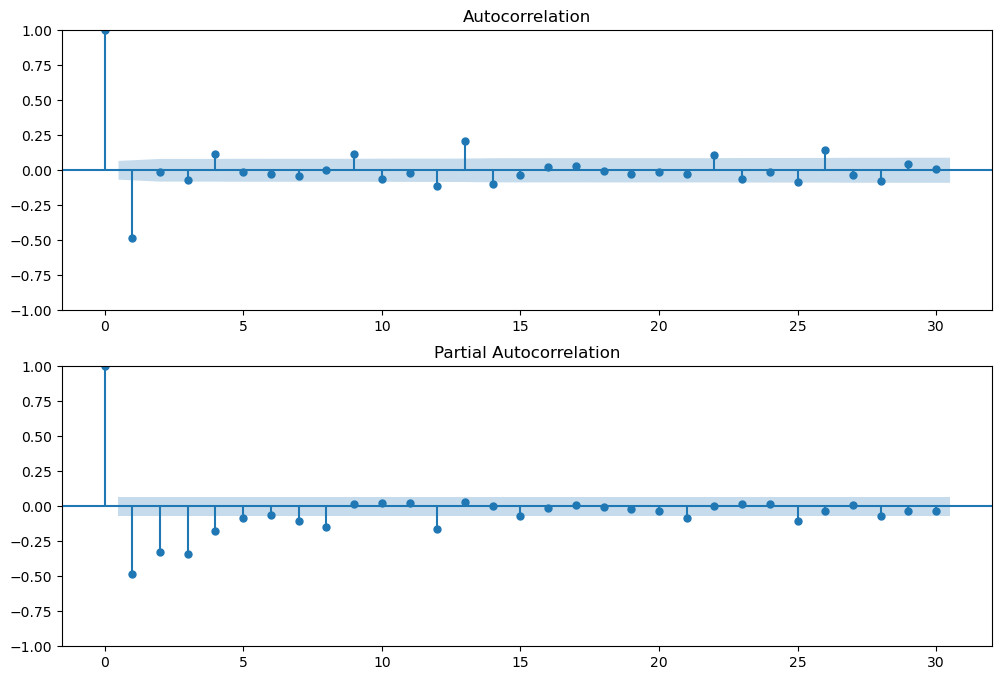

In [16]:
# Generate ACF and PACF plots.
# import tools to plot the above
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store3_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store3_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()


# Analysis of ACF and PACF Plots:
ACF shows large spikes at initial lags and then gradually declines.
PACF shows large spikes at initial lags and then a steep decline.

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store3_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8231.570
Date:                Tue, 11 Jun 2024   AIC                          16469.140
Time:                        10:31:08   BIC                          16483.415
Sample:                             0   HQIC                         16474.605
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0258      0.039     -0.658      0.511      -0.103       0.051
ma.L1         -0.8460      0.017    -50.811      0.000      -0.879      -0.813
sigma2      1.284e+07   3.04e-10   4.23e+16      0.0

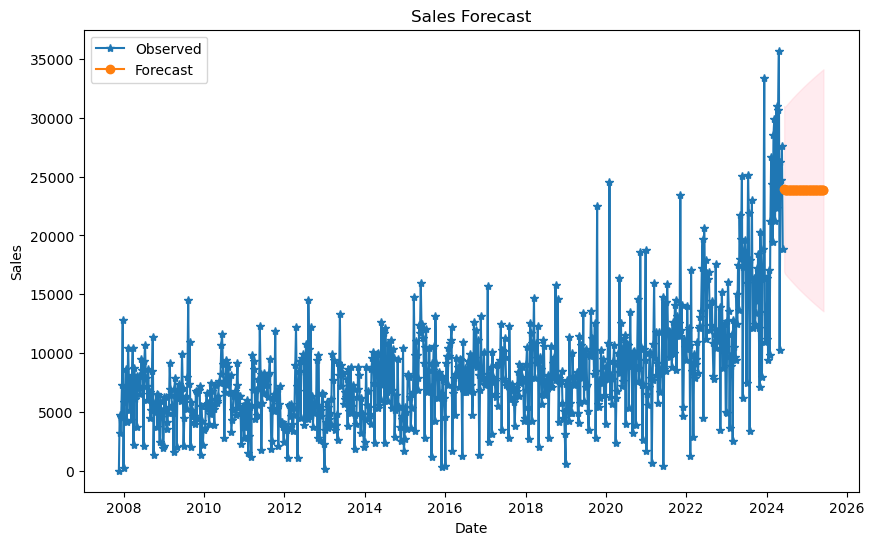

In [18]:

# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store3_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store3_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



# ARIMA analysis for Store 3:
Data shows sales increase over time with variability, the forecast is relatively flat with wide confidence intervals. These wide confidence intervals may be the model's difficulty in capturing a possible upward trend.

# Data may exhibit seasonality, going to run SARIMA model

In [19]:
# import dependency/library for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA for Store 3

In [20]:
# Fit SARIMA model for store 3
model_sarima_store3_final = SARIMAX(store3_final_df["Sales"],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 52)) # 52 chosen due to annual seasonality
model_fit_sarima_store3_final = model_sarima_store3_final.fit()

# Print summary of the model
print(model_fit_sarima_store3_final.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12347D+00    |proj g|=  1.20406D-01


 This problem is unconstrained.



At iterate    5    f=  9.06681D+00    |proj g|=  8.33434D-03

At iterate   10    f=  9.06501D+00    |proj g|=  1.22223D-03

At iterate   15    f=  9.06499D+00    |proj g|=  1.40462D-04

At iterate   20    f=  9.06492D+00    |proj g|=  2.69068D-03

At iterate   25    f=  9.05706D+00    |proj g|=  5.41213D-02

At iterate   30    f=  9.00640D+00    |proj g|=  8.17631D-03

At iterate   35    f=  9.00580D+00    |proj g|=  4.50151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     42      1     0     0   1.285D-05   9.006D+00
  F =   9.0057916975759316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

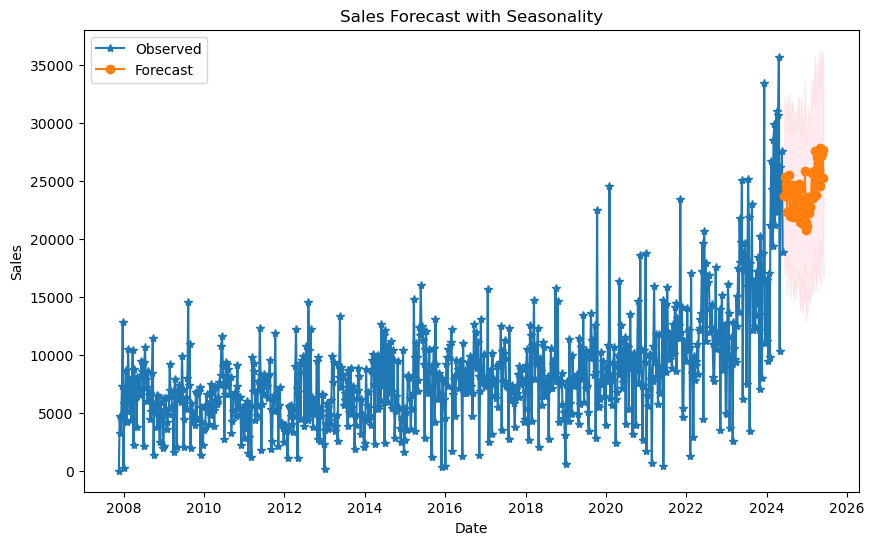

In [21]:
# Forecast future values
forecast_steps = 52  # Number of weeks
forecast_sarima = model_fit_sarima_store3_final.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean_sarima = forecast_sarima.predicted_mean
forecast_conf_int_sarima = forecast_sarima.conf_int()

# Generate forecast index
forecast_index_sarima = pd.date_range(start=store3_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store3_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index_sarima, forecast_mean_sarima, label='Forecast', marker='o')
plt.fill_between(forecast_index_sarima, 
                 forecast_conf_int_sarima.iloc[:, 0], 
                 forecast_conf_int_sarima.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# SARIMA analysis for Store 3:
This model seems to show better performance with a more accurate confidence interval. Unlike the ARIMA model, it seems that the forecast captures the upward trend I mentioned in the ARIMA analysis and periodic patterns (seasonality) better than ARIMA.

# Use R-squared to check accuracy of the models

In [ ]:
# import dependency
from sklearn.metrics import r2_score

In [ ]:
print(store3_final_df.columns)

Index(['Year', 'Week', 'Monthn', 'Sales', 'Gallons', 'Sales_diff'], dtype='object')


In [ ]:
# Create a datetime index from "Year" and "Week" columns
store3_final_df['date'] = pd.to_datetime(store3_final_df['Year'].astype(str) + store3_final_df['Week'].astype(str).str.zfill(2) + '0', format='%Y%U%w')

In [ ]:
# Set the new datetime column as the index
store3_final_df.set_index('date', inplace=True)

In [ ]:
# split the data into train and test sets 
train_size = int(len(store3_final_df) * 0.8)
train, test = store3_final_df.iloc[:train_size], store3_final_df.iloc[train_size]


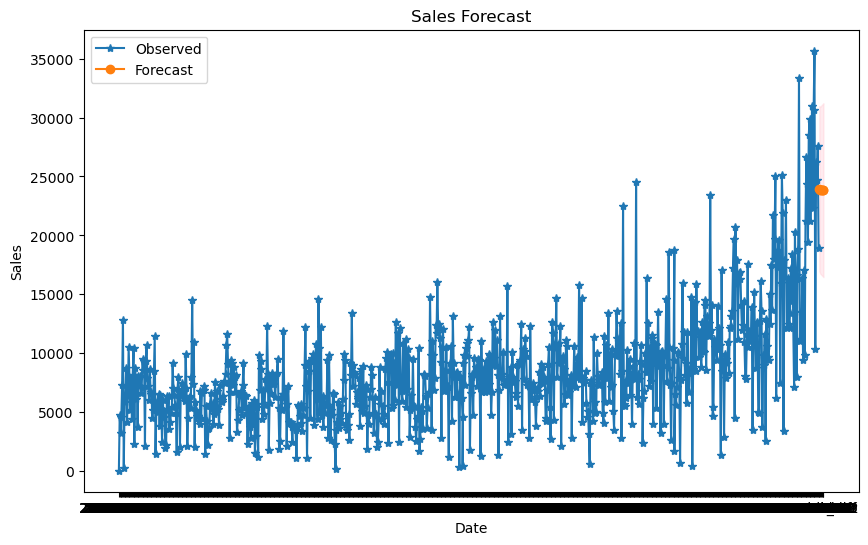

In [ ]:
# Forecast on the test data with confidence intervals
forecast_steps = len(test)
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean and confidence intervals
arima_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Convert datetime indices to strings for plotting
test_index_str = test.index.astype(str)
store3_final_df_index_str = store3_final_df.index.astype(str)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store3_final_df_index_str, store3_final_df['Sales'], label='Observed', marker='*')
plt.plot(test_index_str, arima_forecast, label='Forecast', marker='o')
plt.fill_between(test_index_str, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



In [ ]:
# Compute R-squared score
r2 = r2_score(test, arima_forecast)

print(f'R-squared score: {r2}')

R-squared score: -35.82791774528402


# MSE for Store 3

In [24]:
from sklearn.metrics import mean_squared_error

# Following code was heavily influenced by the following sources:
statsmodel.org, Xpert Learning Assistant, machinelearningplus, geeksforgeeks, and towardsdatascience websites.

In [22]:
# following dependency will be used as an attempt to find best parameters for models
from pmdarima import auto_arima
store3_final_df = store3_final_df.dropna(subset=['Sales'])
# Split your data into training and testing sets
train_size = int(len(store3_final_df) * 0.8)
train, test = store3_final_df['Sales'][:train_size], store3_final_df['Sales'][train_size:]


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=13304.607, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=13117.163, Time=1.77 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=8.68 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=13302.618, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=13120.991, Time=0.01 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=10.16 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=13118.157, Time=1.12 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=13305.154, Time=0.77 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=13047.010, Time=1.71 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=13050.772, Time=0.02 sec
 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=13.54 sec
 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=13047.962, Time=1.42 sec
 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=inf, Time=10.58 sec
 ARIMA(1,1,1)(1,0,0)[52] interce

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.38175D+00    |proj g|=  4.80804D-02

At iterate    5    f=  9.37393D+00    |proj g|=  2.98182D-02

At iterate   10    f=  9.37125D+00    |proj g|=  9.98290D-04

At iterate   15    f=  9.37123D+00    |proj g|=  2.84982D-03

At iterate   20    f=  9.37048D+00    |proj g|=  8.47497D-03

At iterate   25    f=  9.37021D+00    |proj g|=  2.62092D-03

At iterate   30    f=  9.36822D+00    |proj g|=  2.77927D-02

At iterate   35    f=  9.36465D+00    |proj g|=  1.74142D-03

At iterate   40    f=  9.36462D+00    |proj g|=  3.01794D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

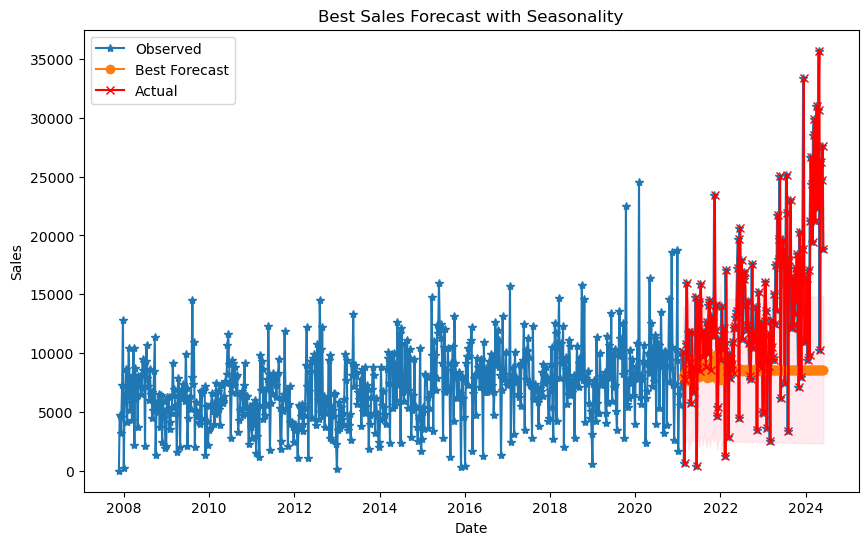

In [25]:

# Fit auto_arima to find the best SARIMA parameters with limited search space
# these parameters were enacted due to processing times and kernel dying 
auto_model = auto_arima(train, seasonal=True, m=52, trace=True,
                            start_p=1, start_q=1, max_p=2, max_q=2,
                            start_P=0, start_Q=0, max_P=1, max_Q=1, max_d=1, max_D=1,
                            stepwise=True, n_jobs=-1)
print(auto_model.summary())

# Fit the best model for Store 3
best_sarima_model = SARIMAX(train, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
best_sarima_model_fit = best_sarima_model.fit()

# Define the forecast steps
forecast_steps = len(test)  # Number of periods to forecast

# Forecast using the best model for Store 3
forecast_best_sarima = best_sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_mean_best_sarima = forecast_best_sarima.predicted_mean
forecast_conf_int_best_sarima = forecast_best_sarima.conf_int()

# Generate forecast index
forecast_index_sarima = pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Extract the actual values for the forecast period
actual_values_sarima = test.values

# Extract the forecasted values
forecast_values_best_sarima = forecast_mean_best_sarima.values

# Ensure the lengths of both arrays are the same
# len had to be used due to errors where an array was expected, but only one value was output
assert len(actual_values_sarima) == len(forecast_values_best_sarima), "Mismatch in number of samples"

# Calculate MSE for Store 3
mse_best_sarima = mean_squared_error(actual_values_sarima, forecast_values_best_sarima)
print(f'Best SARIMA MSE: {mse_best_sarima}')

# Plot the forecast with the best model for Store 3
plt.figure(figsize=(10, 6))
plt.plot(store3_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index_sarima, forecast_mean_best_sarima, label='Best Forecast', marker='o')
plt.fill_between(forecast_index_sarima, 
                 forecast_conf_int_best_sarima.iloc[:, 0], 
                 forecast_conf_int_best_sarima.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.plot(forecast_index_sarima, actual_values_sarima, label='Actual', marker='x', color='red')  # Add actual values to the plot
plt.title('Best Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()




# MSE scores are very low and will likely not be used.
Best SARIMA MSE: 64352049.15676794

# Store 1

In [ ]:
# Import and read file 
store1_path = Path("data/store1_data.csv")
store1_final_df = pd.read_csv(store1_path)

store1_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [ ]:
# Verify Data types in data frame
store1_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [ ]:
# Set the "date" column to datetime format
store1_final_df['date'] = pd.to_datetime(store1_final_df['date'])

In [ ]:
# Set index 
store1_final_df.set_index('date', inplace=True)

In [ ]:
# display first few rows
print(store1_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


In [ ]:
# Repeating this step to avoid error that was coming up while trying to difference
store1_final_df = store1_final_df[~store1_final_df.index.duplicated(keep='first')]

# ARIMA for Store 1

In [ ]:
# Perform the ADF test to check for stationarity
result = adfuller(store1_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -10.47210579042704
p-value: 1.276417926893067e-18
The time series is stationary.


# Stationary after first ADF test, differencing not necessary

In [ ]:
# Apply differencing
#store1_final_df['Sales_diff'] = store1_final_df['Sales'].diff().dropna()

In [ ]:
# Perform ADF test on the differenced series
#differenced_adf = adfuller(store1_final_df['Sales_diff'].dropna())
#print("Differenced ADF Statistic:", differenced_adf[0])
#print("Differenced p-value:", differenced_adf[1])

#if differenced_adf[1] <= 0.05:
    #print("The differenced time series is stationary.")

Differenced ADF Statistic: -11.20454323793714
Differenced p-value: 2.201392339577934e-20
The differenced time series is stationary.


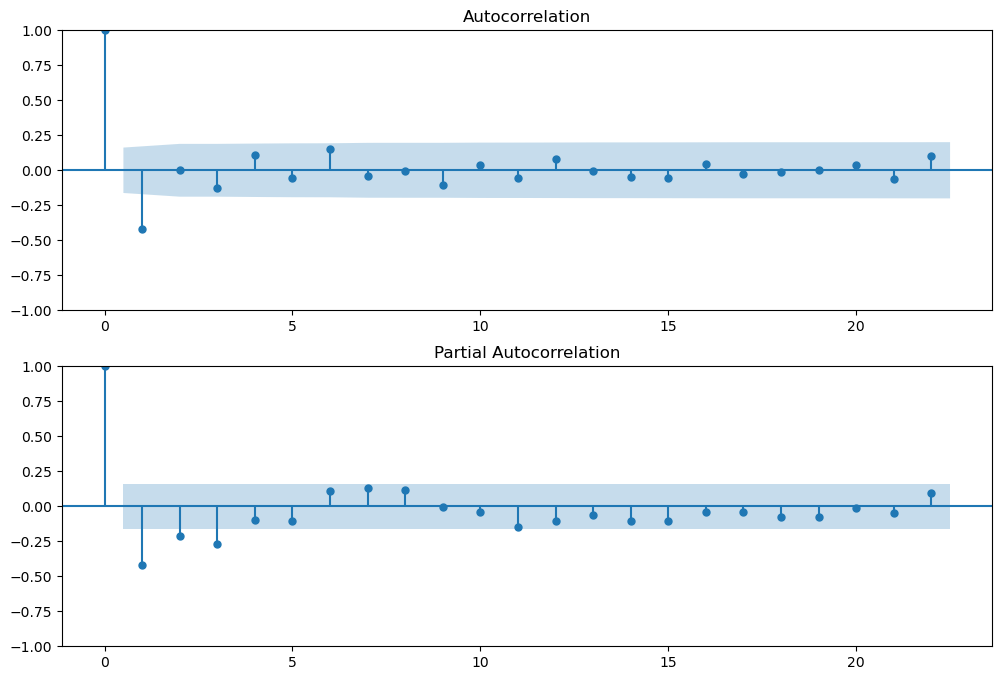

In [ ]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store1_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store1_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

# Analysis of ACF and PACF plots:
ACF plot shows significant spikes at lag 1, and then gradually declines. This might suggest that the series may have an autoregressive component.
PACF plot shows a sharp decline after lag 1. Might mean that an AR 1 model might work.

In [ ]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store1_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1765.390
Date:                Sun, 09 Jun 2024   AIC                           3536.779
Time:                        10:52:06   BIC                           3551.054
Sample:                             0   HQIC                          3542.244
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1400      0.107      1.309      0.191      -0.070       0.350
ma.L1         -0.9503      0.050    -19.162      0.000      -1.047      -0.853
sigma2      9.673e+08    4.7e-11   2.06e+19      0.0

# Reminder to look up and research warnings for presentation

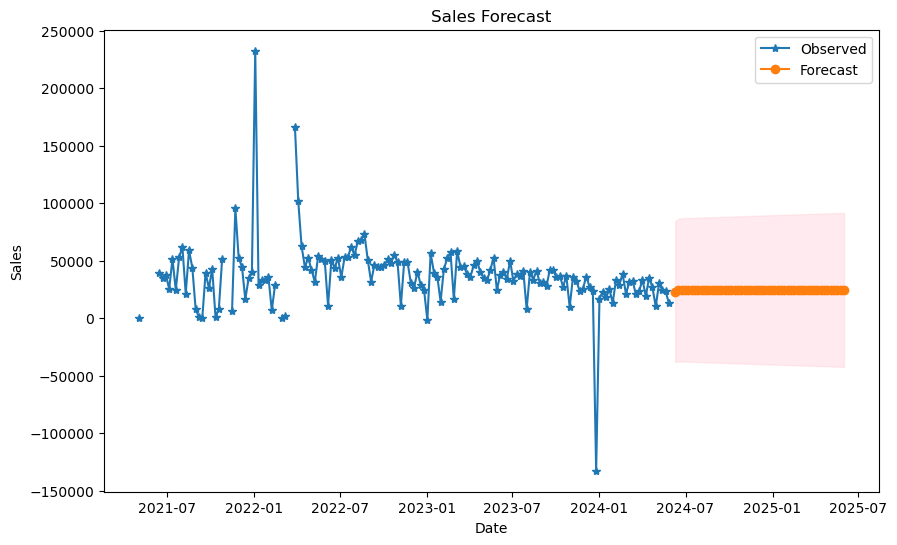

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store1_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store1_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ARIMA analysis for Store 1:
Data shows a very high level of variability and some outliers, specifically around 2022. The forecasted values are relatively stable, which indicates that the model is having problems trying to capture the data's variability.

# SARIMA for Store 1

In [ ]:
# Fit SARIMA model for store 1
model_sarima_store1_final = SARIMAX(store1_final_df["Sales"],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 52)) # 52 chosen due to annual seasonality
model_fit_sarima_store1_final = model_sarima_store1_final.fit()

# Print summary of the model
print(model_fit_sarima_store1_final.summary())


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17061D+00    |proj g|=  6.77647D-02

At iterate    5    f=  2.10495D+00    |proj g|=  5.35765D-03

At iterate   10    f=  2.10076D+00    |proj g|=  1.27527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   7.071D-06   2.101D+00
  F =   2.1007541601975790     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

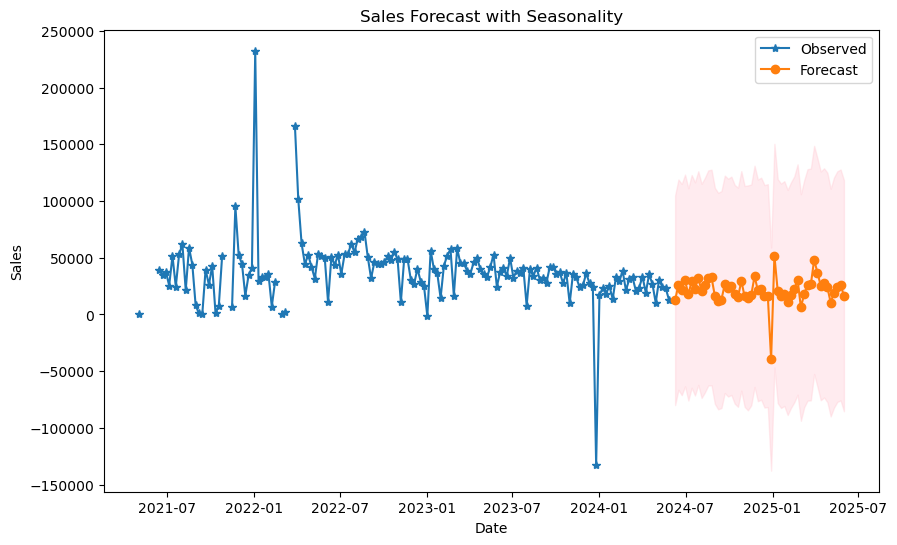

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of weeks
forecast_sarima = model_fit_sarima_store1_final.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean_sarima = forecast_sarima.predicted_mean
forecast_conf_int_sarima = forecast_sarima.conf_int()

# Generate forecast index
forecast_index_sarima = pd.date_range(start=store1_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store1_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index_sarima, forecast_mean_sarima, label='Forecast', marker='o')
plt.fill_between(forecast_index_sarima, 
                 forecast_conf_int_sarima.iloc[:, 0], 
                 forecast_conf_int_sarima.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# SARIMA analysis for Store 1:
This forecast shows a wider confidence interval. This shows that the model is keeping account of the seasonality but is still having issues with the variability in the data. It also appears that the seasonal patterns expected are not very apparent.

# Store 2

In [ ]:
# Import and read file 
store2_path = Path("data/store2_data.csv")
store2_final_df = pd.read_csv(store2_path)

store2_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [ ]:
# Verify Data types in data frame
store2_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [ ]:
# Set the "date" column to datetime format
store2_final_df['date'] = pd.to_datetime(store2_final_df['date'])

In [ ]:
# Set index 
store2_final_df.set_index('date', inplace=True)

In [ ]:
# display first few rows
print(store2_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


In [ ]:
# Repeating this step to avoid error that was coming up while trying to difference, again for consistency
store2_final_df = store2_final_df[~store2_final_df.index.duplicated(keep='first')]

# ARIMA for Store 2

In [ ]:
# Perform the ADF test to check for stationarity
result = adfuller(store2_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.7803732266893886
p-value: 0.06113246540208437
The time series is not stationary.


# Not stationary, run differencing.

In [ ]:
# Apply differencing
store2_final_df['Sales_diff'] = store2_final_df['Sales'].diff().dropna()

In [ ]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store2_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -6.591018075380598
Differenced p-value: 7.114426107445535e-09
The differenced time series is stationary.


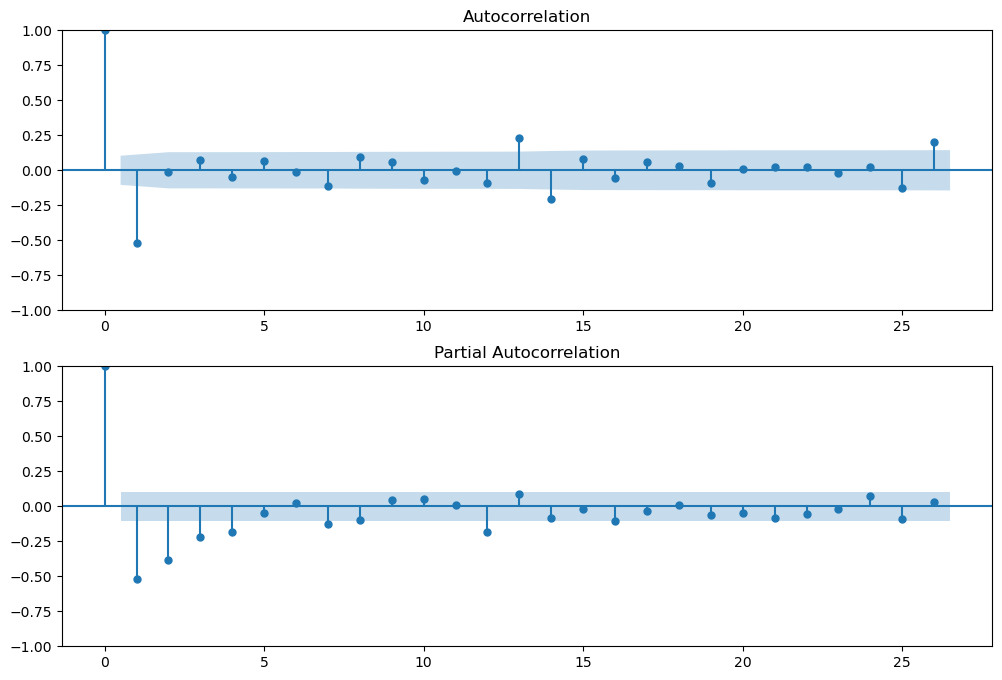

In [ ]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store2_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store2_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

# Analysis for ACF and PACF:
ACF plot shows large spikes at initial lags, may be evidence of autocorrelation.
PACF plot also shows large spikes at initial lags, might be suggestive of autoregressive terms.

In [ ]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store2_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3517.681
Date:                Sun, 09 Jun 2024   AIC                           7041.362
Time:                        10:56:52   BIC                           7055.636
Sample:                             0   HQIC                          7046.826
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1067      0.055     -1.942      0.052      -0.214       0.001
ma.L1         -0.7641      0.034    -22.711      0.000      -0.830      -0.698
sigma2      2.111e+07   7.69e-10   2.75e+16      0.0

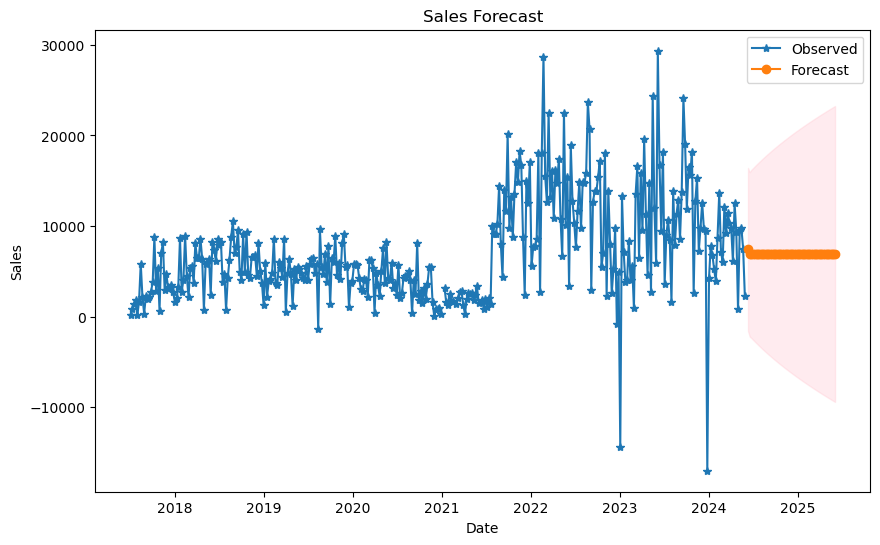

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store2_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store2_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ARIMA analysis for Store 2:
Data shows periodic spikes, indicating seasonality. The forecasted values are relatively flat with wide confidence intervals, which may suggest that the model is not capturing the seasonality well.

# SARIMA for Store 2

In [ ]:
# Fit SARIMA model for store 2
model_sarima_store2_final = SARIMAX(store2_final_df["Sales"],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 52)) # 52 chosen due to annual seasonality
model_fit_sarima_store2_final = model_sarima_store2_final.fit()

# Print summary of the model
print(model_fit_sarima_store2_final.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23703D+00    |proj g|=  2.39310D-02


 This problem is unconstrained.



At iterate    5    f=  4.21979D+00    |proj g|=  2.03040D-03

At iterate   10    f=  4.21537D+00    |proj g|=  5.55683D-02

At iterate   15    f=  4.15087D+00    |proj g|=  3.78635D-02

At iterate   20    f=  4.14144D+00    |proj g|=  3.86983D-04

At iterate   25    f=  4.14143D+00    |proj g|=  1.91385D-04

At iterate   30    f=  4.14140D+00    |proj g|=  3.24022D-03

At iterate   35    f=  4.13764D+00    |proj g|=  3.54716D-02

At iterate   40    f=  4.10823D+00    |proj g|=  1.08869D-02

At iterate   45    f=  4.10623D+00    |proj g|=  1.95037D-03

At iterate   50    f=  4.10584D+00    |proj g|=  5.91872D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

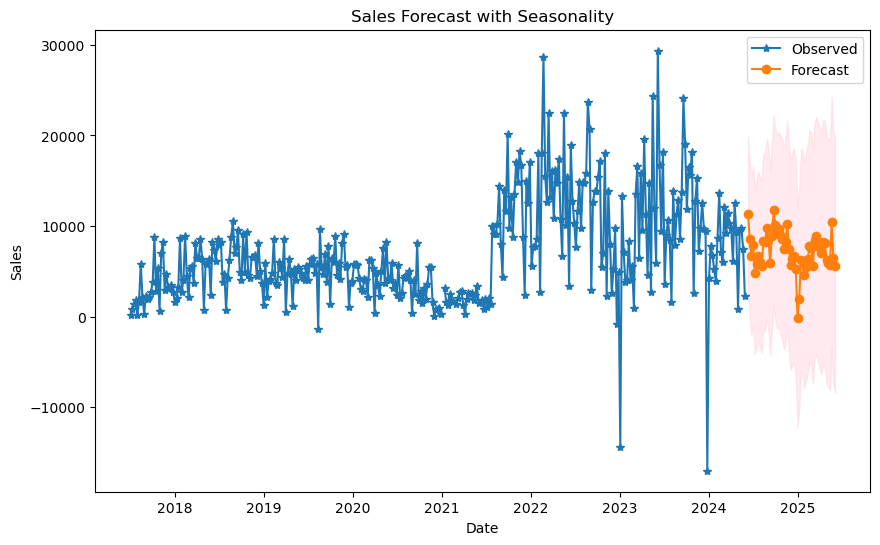

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of weeks
forecast_sarima = model_fit_sarima_store2_final.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean_sarima = forecast_sarima.predicted_mean
forecast_conf_int_sarima = forecast_sarima.conf_int()

# Generate forecast index
forecast_index_sarima = pd.date_range(start=store2_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store2_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index_sarima, forecast_mean_sarima, label='Forecast', marker='o')
plt.fill_between(forecast_index_sarima, 
                 forecast_conf_int_sarima.iloc[:, 0], 
                 forecast_conf_int_sarima.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# SARIMA analysis for Store 2:
This model's confidence interval is more accurate plus the forecast shows a better fit for the data. SARIMA model seems much better at capturing seasonal patterns.

# Store 4 (Reminder Store 3 was done first)

In [ ]:
# Import and read file 
store4_path = Path("data/store4_data.csv")
store4_final_df = pd.read_csv(store4_path)

store4_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [ ]:
# Verify Data types in data frame
store4_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [ ]:
# Set the "date" column to datetime format
store4_final_df['date'] = pd.to_datetime(store4_final_df['date'])

In [ ]:
# Set index 
store4_final_df.set_index('date', inplace=True)

In [ ]:
# display first few rows
print(store4_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


# Reminder...NaN values because this store did not exist in 2007, same with Stores 1 and 2

In [ ]:
# Repeating this step to avoid error that was coming up while trying to difference, again for consistency
store4_final_df = store4_final_df[~store4_final_df.index.duplicated(keep='first')]

# ARIMA for Store 4

In [ ]:
# Perform the ADF test to check for stationarity
result = adfuller(store4_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.2540743485240706
p-value: 0.18720775384143068
The time series is not stationary.


# Not stationary, run differencing

In [ ]:
# Apply differencing
store4_final_df['Sales_diff'] = store4_final_df['Sales'].diff().dropna()

In [ ]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store4_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -6.689644081958729
Differenced p-value: 4.1407562655967995e-09
The differenced time series is stationary.


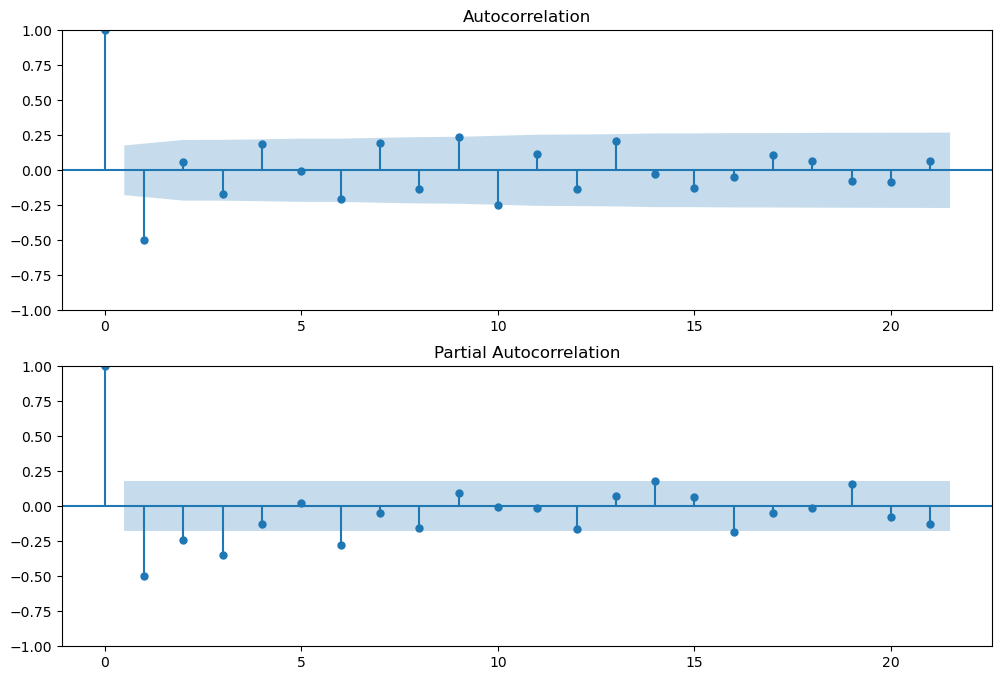

In [ ]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store4_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store4_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

# ACF and PACF analysis:
The ACF plot shows a significant spike at lag 1 and other initial lags.
The PACF plot shows significant spikes at initial lags with a gradual decline after.

In [ ]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store4_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1096.852
Date:                Sun, 09 Jun 2024   AIC                           2199.704
Time:                        11:09:44   BIC                           2213.979
Sample:                             0   HQIC                          2205.169
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0668      0.117      0.572      0.567      -0.162       0.296
ma.L1         -0.8859      0.049    -18.182      0.000      -0.981      -0.790
sigma2      3.438e+06   4.74e+05      7.258      0.0

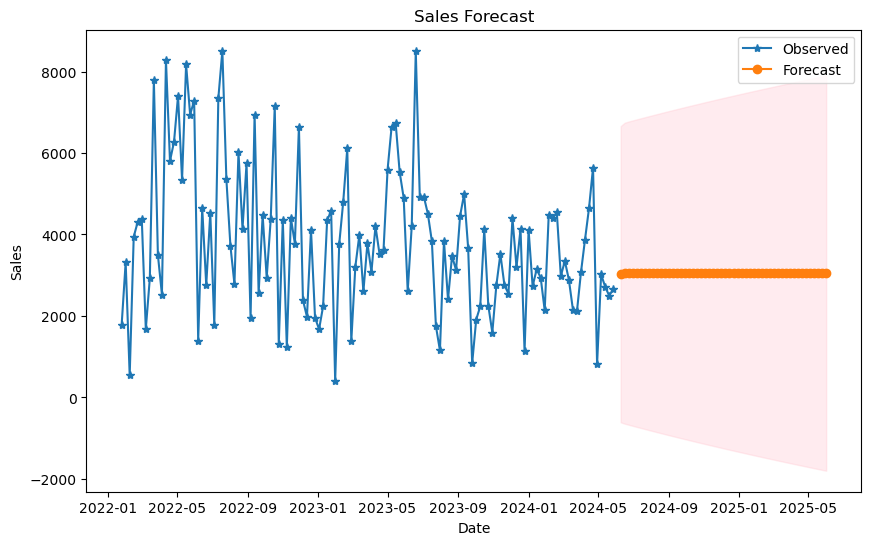

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store4_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store4_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ARIMA analysis for Store 4:
Data shows significant spikes and drops, which indicates high variability. The forecast is relatively flat (like the others) which shows that the model is struggling with the variability.

# SARIMA for Store 4

In [ ]:
# Fit SARIMA model for store 4
model_sarima_store4_final = SARIMAX(store4_final_df["Sales"],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 52)) # 52 chosen due to annual seasonality
model_fit_sarima_store4_final = model_sarima_store4_final.fit()

# Print summary of the model
print(model_fit_sarima_store4_final.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37545D+00    |proj g|=  6.37173D-02

At iterate    5    f=  1.31616D+00    |proj g|=  4.22555D-03

At iterate   10    f=  1.31441D+00    |proj g|=  1.04734D-04

At iterate   15    f=  1.31440D+00    |proj g|=  9.88460D-05

At iterate   20    f=  1.31427D+00    |proj g|=  1.63251D-03

At iterate   25    f=  1.29597D+00    |proj g|=  2.69025D-02

At iterate   30    f=  1.28955D+00    |proj g|=  6.09151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

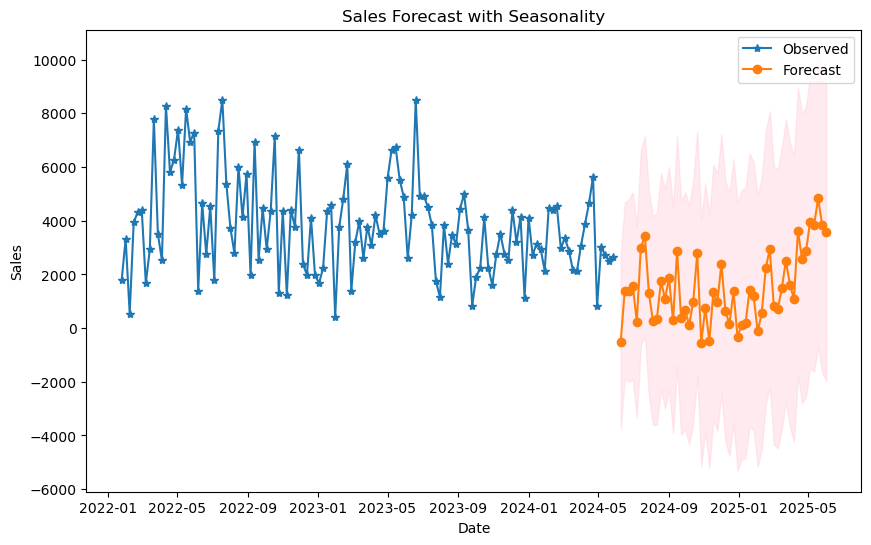

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of weeks
forecast_sarima = model_fit_sarima_store4_final.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean_sarima = forecast_sarima.predicted_mean
forecast_conf_int_sarima = forecast_sarima.conf_int()

# Generate forecast index
forecast_index_sarima = pd.date_range(start=store4_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store4_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index_sarima, forecast_mean_sarima, label='Forecast', marker='o')
plt.fill_between(forecast_index_sarima, 
                 forecast_conf_int_sarima.iloc[:, 0], 
                 forecast_conf_int_sarima.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# SARIMA analysis for Store 4:
This model shows a much wider confidence interval and does a better job capturing the seasonality. This is also illustrated by the forecast, which shows a better handling of the seasonality.

# Store 5

In [ ]:
# Import and read file 
store5_path = Path("data/store5_data.csv")
store5_final_df = pd.read_csv(store5_path)

store5_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [ ]:
# Verify Data types in data frame
store5_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [ ]:
# Set the "date" column to datetime format
store5_final_df['date'] = pd.to_datetime(store5_final_df['date'])

In [ ]:
# Set index 
store5_final_df.set_index('date', inplace=True)

In [ ]:
# display first few rows
print(store5_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


In [ ]:
# Repeating this step to avoid error that was coming up while trying to difference, again for consistency
store5_final_df = store5_final_df[~store5_final_df.index.duplicated(keep='first')]

# ARIMA Store 5

In [ ]:
# Perform the ADF test to check for stationarity
result = adfuller(store5_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.42665207540503
p-value: 0.13435490718659748
The time series is not stationary.


# Not stationary, run differencing

In [ ]:
# Apply differencing
store5_final_df['Sales_diff'] = store5_final_df['Sales'].diff().dropna()

In [ ]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store5_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -6.051219862277166
Differenced p-value: 1.2762187105689469e-07
The differenced time series is stationary.


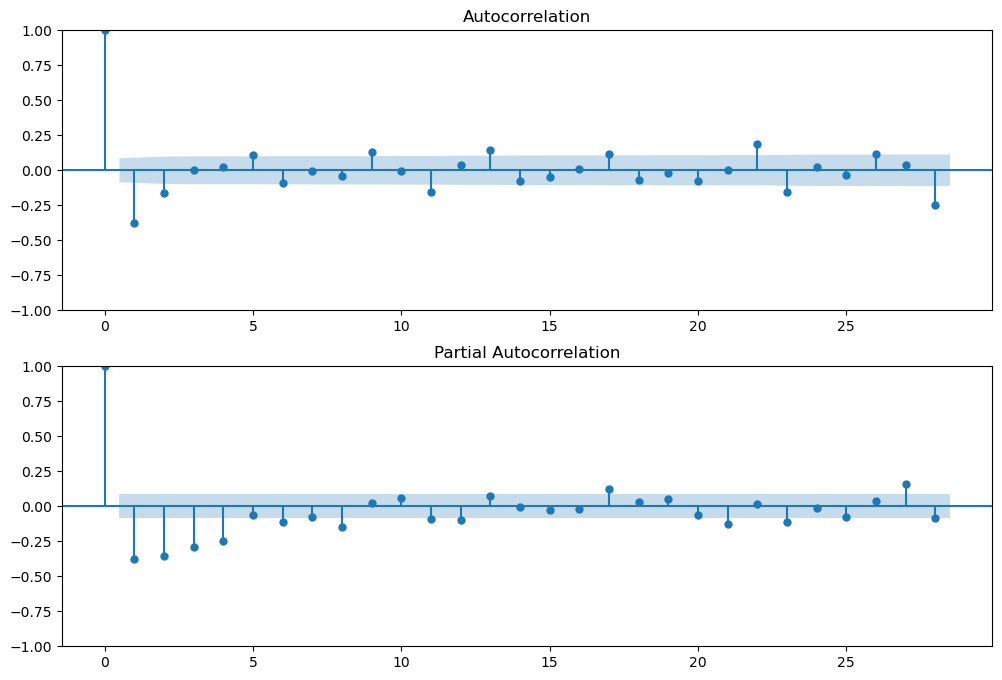

In [ ]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store5_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store5_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

# ACF and PACF Analysis:
ACF plot shows a large spike at lag 1, with a gradual decline after.
The PACF plot shows large spikes at the initial lags, which might be evidence of autoregressive components.

In [ ]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store5_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5026.783
Date:                Sun, 09 Jun 2024   AIC                          10059.566
Time:                        11:19:25   BIC                          10073.841
Sample:                             0   HQIC                         10065.031
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0572      0.044      1.310      0.190      -0.028       0.143
ma.L1         -0.8083      0.024    -33.600      0.000      -0.855      -0.761
sigma2      1.394e+07   8.13e-10   1.72e+16      0.0

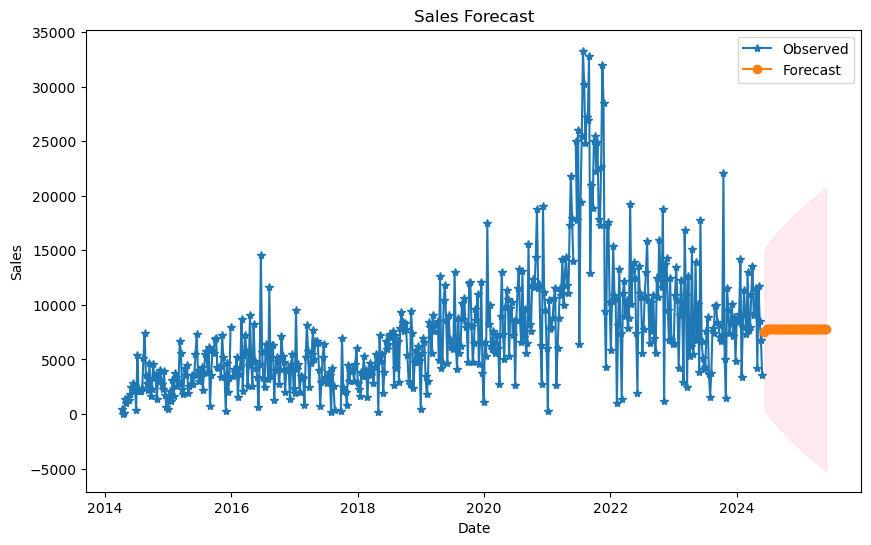

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store5_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store5_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ARIMA analysis for Store 5:
Data shows periodic spikes and with what appears to be an overall upward trend. Again, the forecast is relatively flat with wide confidence intervals. This suggest that the ARIMA model may have difficulty in capturing the trend and variability.

# SARIMA for Store 5

In [ ]:
# Fit SARIMA model for store 5
model_sarima_store5_final = SARIMAX(store5_final_df["Sales"],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 52)) # 52 chosen due to annual seasonality
model_fit_sarima_store5_final = model_sarima_store5_final.fit()

# Print summary of the model
print(model_fit_sarima_store5_final.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08563D+00    |proj g|=  2.84861D-01

At iterate    5    f=  5.95225D+00    |proj g|=  7.91392D-03

At iterate   10    f=  5.95102D+00    |proj g|=  1.87775D-04

At iterate   15    f=  5.95102D+00    |proj g|=  4.41488D-04

At iterate   20    f=  5.95092D+00    |proj g|=  5.95654D-03

At iterate   25    f=  5.94012D+00    |proj g|=  5.74488D-02

At iterate   30    f=  5.86863D+00    |proj g|=  1.95495D-02

At iterate   35    f=  5.86777D+00    |proj g|=  3.40192D-03

At iterate   40    f=  5.86763D+00    |proj g|=  1.24630D-03

At iterate   45    f=  5.86760D+00    |proj g|=  3.20773D-04

At iterate   50    f=  5.86759D+00    |proj g|=  5.31965D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

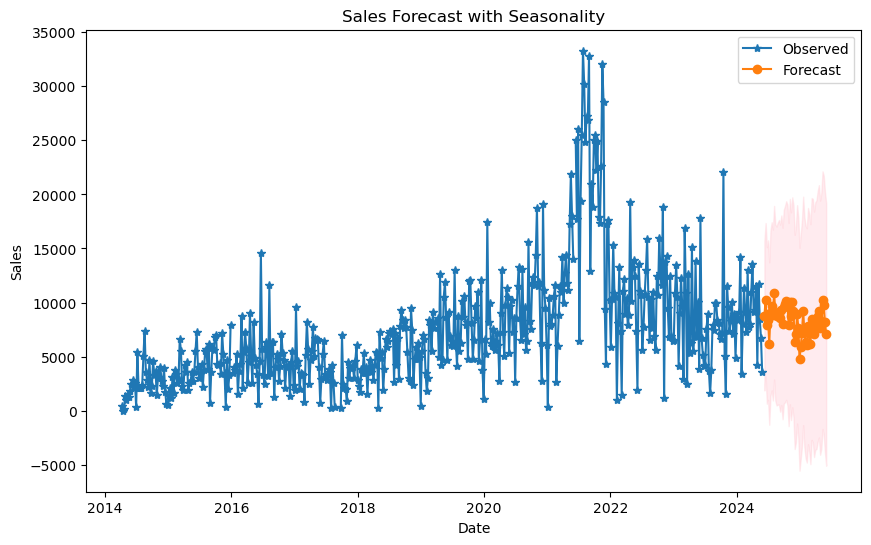

In [ ]:
# Forecast future values
forecast_steps = 52  # Number of weeks
forecast_sarima = model_fit_sarima_store5_final.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean_sarima = forecast_sarima.predicted_mean
forecast_conf_int_sarima = forecast_sarima.conf_int()

# Generate forecast index
forecast_index_sarima = pd.date_range(start=store5_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store5_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index_sarima, forecast_mean_sarima, label='Forecast', marker='o')
plt.fill_between(forecast_index_sarima, 
                 forecast_conf_int_sarima.iloc[:, 0], 
                 forecast_conf_int_sarima.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# SARIMA analysis for Store 5:
The SARIMA model shows a much accurate forecast with narrower confidence intervals. The model also seems to capture the seasonal patterns better and aligns better with the observed data.

# Overall thoughts:
It seems that the SARIMA models provide better forecasts by capturing seasonal patterns better than the ARIMA models used here. It also seems where there is high variability, it poses a challenge for both models which results in wider confidence intervals. Attempts at model accuracy were made by trying to get an R square score and MSE score, but scores that were received were not great. The main metric I used in verifying the accuracy of the models were the AIC/BIC scores provided by each SARIMAX report. 
Although the AIC/BIC scores were higher on the SARIMA SARIMAX reports, practical performance and interpretability of the forecast can be equally important in real world applications. This is not to say that other measurements such  as R square, MSE, RMSE, are not worth calculating, but due to time constraints I used the data that was available to me.
Steps for further analysis would include both Residual Analysis and Cross Validation of the models to understand predictive performance and to see if the models indicate a better generalization of the data. These steps plus visual inspections of the models would provide a more holistic view of how well the model(s) perform.